In [132]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

In [133]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_gender_submission = pd.read_csv('gender_submission.csv')

In [134]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [135]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [136]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [137]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [138]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [139]:
corr = list(df_train.columns[1:])
corr = df_train[corr].corr()


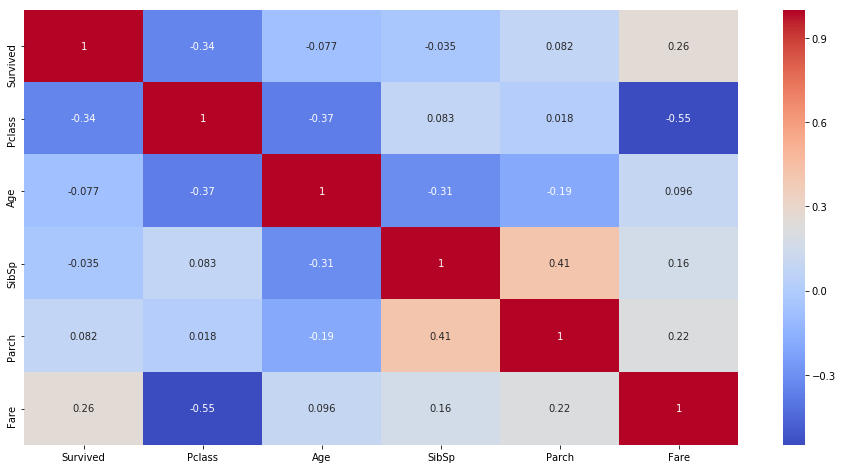

In [140]:
plt.figure(figsize=(16,8))
ax = sns.heatmap(corr, cmap='coolwarm', annot=True)

In [141]:
a = df_train[['Survived', 'Pclass']].groupby(['Pclass']).mean()
a

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


This indicates a very bad survival rate for people with class 3 tickets.

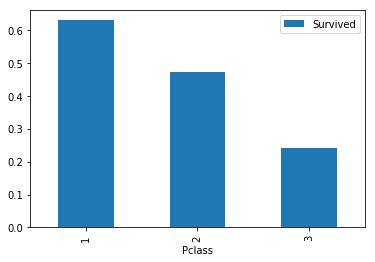

In [142]:
a.plot.bar()

In [143]:
s = df_train[['Survived', 'Sex']].groupby(['Sex']).mean()
s

,Survived
Sex,
female,0.742038
male,0.188908


The survival rate is around 19 percent if you are a male.

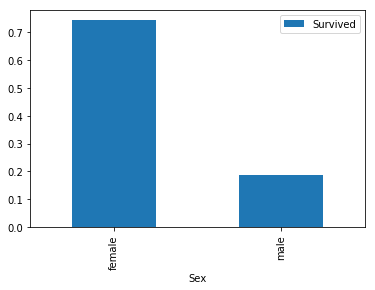

In [144]:
s.plot.bar()

In [145]:
a = df_train[['Survived', 'Sex','Pclass']].groupby(['Sex', 'Pclass']).mean()
a

Survived
Sex    Pclass          
female 1       0.968085
       2       0.921053
       3       0.500000
male   1       0.368852
       2       0.157407
       3       0.135447

### This means a make with class 3 ticket has only 13.5 % chance of survival and a female with class 1 ticket has 96.8% chance of survival.

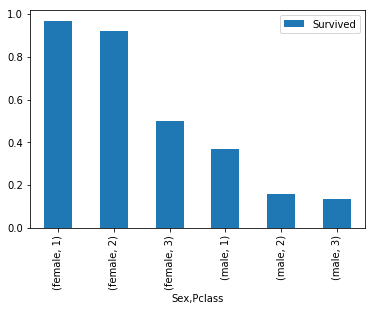

In [146]:
a.plot.bar()

In [147]:
df_train['AgeRange'] = pd.cut(df_train['Age'], 5, precision=0)

In [148]:
ag = df_train[['AgeRange', 'Survived']].groupby(['AgeRange']).mean()
ag

,Survived
AgeRange,
"(0.0, 16.0]",0.550000
"(16.0, 32.0]",0.369942
"(32.0, 48.0]",0.404255
"(48.0, 64.0]",0.434783
"(64.0, 80.0]",0.090909


<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 864x504 with 0 Axes>

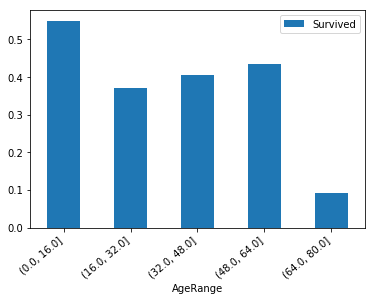

In [149]:
plt.figure(figsize=(12,7))
ax = ag.plot.bar()
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show

In [150]:
df_train[['SibSp', 'Survived']].groupby(['SibSp']).mean()

,Survived
SibSp,
0,0.345395
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000


In [151]:
df_train[['Parch', 'Survived']].groupby(['Parch']).mean()

,Survived
Parch,
0,0.343658
1,0.550847
2,0.500000
3,0.600000
4,0.000000
5,0.200000
6,0.000000


In [152]:
df_train[['Embarked', 'Survived']].groupby(['Embarked']).mean()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


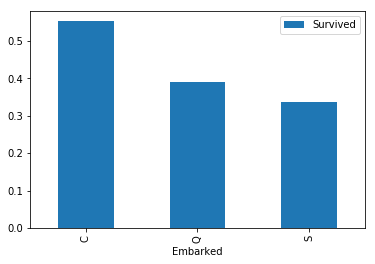

In [153]:
df_train[['Embarked', 'Survived']].groupby(['Embarked']).mean().plot.bar()

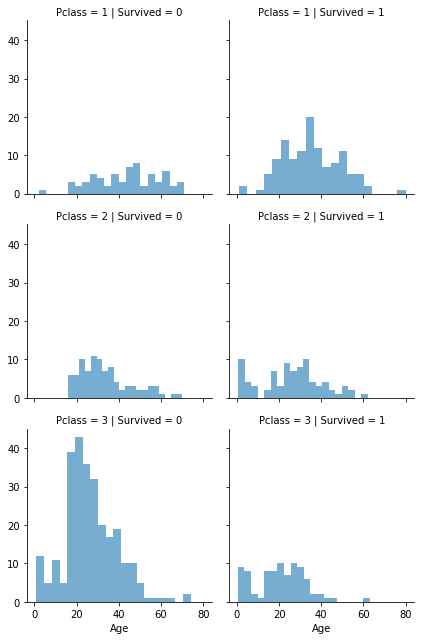

In [154]:
grid = sns.FacetGrid(df_train, col='Survived', row='Pclass')
grid.map(plt.hist, 'Age', alpha=.6, bins=20)

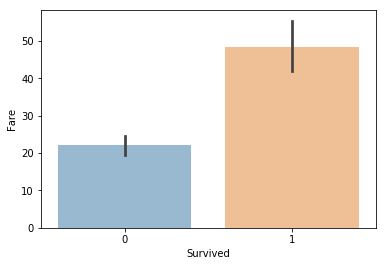

In [155]:
sns.barplot(x='Survived', y='Fare', alpha=.5, data = df_train)

In [156]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'AgeRange'],
      dtype='object')

In [157]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeRange
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"(16.0, 32.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"(32.0, 48.0]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(16.0, 32.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"(32.0, 48.0]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"(32.0, 48.0]"


In [158]:
df_train = df_train.drop(['Name','Ticket','Cabin'], axis=1)
df_test = df_test.drop(['Name','Ticket','Cabin'], axis=1)

In [159]:
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeRange
0,1,0,3,male,22.0,1,0,7.2500,S,"(16.0, 32.0]"
1,2,1,1,female,38.0,1,0,71.2833,C,"(32.0, 48.0]"
2,3,1,3,female,26.0,0,0,7.9250,S,"(16.0, 32.0]"
3,4,1,1,female,35.0,1,0,53.1000,S,"(32.0, 48.0]"
4,5,0,3,male,35.0,0,0,8.0500,S,"(32.0, 48.0]"


In [160]:
di = {'male':0,'female':1}
df_train['Sex'] = df_train['Sex'].map(di)

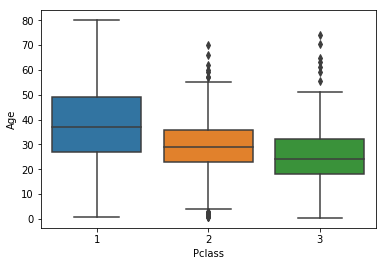

In [161]:
sns.boxplot(x='Pclass',y='Age',data=df_train)

In [162]:
def agerep(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
          return 38
        elif Pclass == 2:
          return 28
        else:
          return 24
    else:
        return Age
        
        
        

In [163]:
df_train['Age'] = df_train[['Age','Pclass']].apply(agerep,axis = 1)

In [164]:
df_train['Embarked'] = df_train['Embarked'].fillna('S')

In [165]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Embarked         0
AgeRange       177
dtype: int64

In [166]:
df_train.loc[ df_train['Age'] <= 16, 'Age'] = 0
df_train.loc[(df_train['Age'] > 16) & (df_train['Age'] <= 32), 'Age'] = 1
df_train.loc[(df_train['Age'] > 32) & (df_train['Age'] <= 48), 'Age'] = 2
df_train.loc[(df_train['Age'] > 48) & (df_train['Age'] <= 64), 'Age'] = 3
df_train.loc[ df_train['Age'] > 64, 'Age'] = 4

Based on the average ages found above

In [167]:
df_train = df_train.drop(['AgeRange'], axis=1)

In [168]:
df_train = df_train.drop(['PassengerId'], axis=1)

In [169]:
df_train['Age']=df_train['Age'].astype(int)

In [170]:
df_train['Embarked'] = df_train['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} )

In [171]:
df_train.loc[ df_train['Fare'] <= 7.91, 'Fare'] = 0
df_train.loc[(df_train['Fare'] > 7.91) & (df_train['Fare'] <= 14.454), 'Fare'] = 1
df_train.loc[(df_train['Fare'] > 14.454) & (df_train['Fare'] <= 31), 'Fare']   = 2
df_train.loc[ df_train['Fare'] > 31, 'Fare'] = 3
df_train['Fare'] = df_train['Fare'].astype(int)

In [172]:
df_test['Embarked'] = df_test['Embarked'].fillna('S')
df_test['Age'] = df_test[['Age','Pclass']].apply(agerep,axis = 1)

In [173]:
df_test['Embarked'] = df_test['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} )

In [174]:
df_test.loc[ df_test['Fare'] <= 7.91, 'Fare'] = 0
df_test.loc[(df_test['Fare'] > 7.91) & (df_test['Fare'] <= 14.454), 'Fare'] = 1
df_test.loc[(df_test['Fare'] > 14.454) & (df_test['Fare'] <= 31), 'Fare']   = 2
df_test.loc[ df_test['Fare'] > 31, 'Fare'] = 3


In [175]:
df_test.loc[ df_train['Age'] <= 16, 'Age'] = 0
df_test.loc[(df_train['Age'] > 16) & (df_test['Age'] <= 32), 'Age'] = 1
df_test.loc[(df_train['Age'] > 32) & (df_test['Age'] <= 48), 'Age'] = 2
df_test.loc[(df_train['Age'] > 48) & (df_test['Age'] <= 64), 'Age'] = 3
df_test.loc[ df_train['Age'] > 64, 'Age'] = 4

df_test['Sex'] = df_test['Sex'].map(di)

df_test['Age']=df_test['Age'].astype(int)

In [176]:
df_test['Fare'] = df_test['Fare'].fillna(2)

In [177]:
df_test['Fare'] = df_test['Fare'].astype(int)

In [178]:
df_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,0,0,0,0,0,2
1,893,3,1,0,1,0,0,0
2,894,2,0,0,0,0,1,2
3,895,3,0,0,0,0,1,0
4,896,3,1,0,1,1,1,0


In [179]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,1,1,0,0,0
1,1,1,1,2,1,0,3,1
2,1,3,1,1,0,0,1,0
3,1,1,1,2,1,0,3,0
4,0,3,0,2,0,0,1,0


Using machine learning

In [180]:
test_data = df_gender_submission['Survived']

In [181]:
combined_test = pd.merge(df_test, df_gender_submission, on = 'PassengerId')

In [182]:
from sklearn.model_selection import train_test_split
from sklearn.cross_validation import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn import metrics


In [183]:
X_train = df_train.drop("Survived", axis=1)
Y_train = df_train["Survived"]
#X_test  = df_test.drop("PassengerId", axis=1)
X_test  = combined_test.drop(["PassengerId","Survived"], axis=1)
X_train.shape, Y_train.shape, X_test.shape

((891, 7), (891,), (418, 7))

In [184]:
# I have created a function to perform k folds cross validation which helps in obtaining a better insight to test the accuracy of the model
# More info at https://www.analyticsvidhya.com/blog/2018/05/improve-model-performance-cross-validation-in-python-r/

def classification_model(model, data, predictors, outcome):
  #Fit the model:
  model.fit(data[predictors],data[outcome])
  
  predictions = model.predict(data[predictors])
  
  accuracy = metrics.accuracy_score(predictions,data[outcome])
  print("Accuracy : %s" % "{0:.3%}".format(accuracy))

  #Perform k-fold cross-validation with 5 folds
  kf = KFold(data.shape[0],n_folds= 5)
  error = []
  for train, test in kf:
    # Filter the training data
    train_predictors = (data[predictors].iloc[train,:])
    train_target = data[outcome].iloc[train]
    model.fit(train_predictors, train_target)
    
    error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
    
    print("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))
    
  model.fit(data[predictors],data[outcome]) 

Logistic Regression

In [185]:
model = LogisticRegression()
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

predictor_var = list(X_train[1:])
outcome_var='Survived'
classification_model(model,df_train,predictor_var,outcome_var)

Accuracy : 80.135%
Cross-Validation Score : 77.654%
Cross-Validation Score : 78.995%
Cross-Validation Score : 79.068%
Cross-Validation Score : 77.981%
Cross-Validation Score : 78.789%


In [186]:
print('Accuracy on Test data:')
print(accuracy_score(combined_test['Survived'], Y_pred))
print('\n')
print(classification_report(combined_test['Survived'], Y_pred))

Accuracy on Test data:
0.8277511961722488


             precision    recall  f1-score   support

          0       0.98      0.74      0.85       266
          1       0.68      0.98      0.81       152

avg / total       0.88      0.83      0.83       418



KNN

In [187]:
model =  KNeighborsClassifier(n_neighbors = 3)
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

predictor_var = list(X_train[1:])
outcome_var='Survived'
classification_model(model,df_train,predictor_var,outcome_var)

Accuracy : 86.195%
Cross-Validation Score : 65.922%
Cross-Validation Score : 72.849%
Cross-Validation Score : 74.970%
Cross-Validation Score : 75.329%
Cross-Validation Score : 75.432%


In [188]:
print('Accuracy on Test data:')
print(accuracy_score(combined_test['Survived'], Y_pred))
print('\n')
print(classification_report(combined_test['Survived'], Y_pred))

Accuracy on Test data:
0.7607655502392344


             precision    recall  f1-score   support

          0       0.92      0.68      0.78       266
          1       0.62      0.89      0.73       152

avg / total       0.81      0.76      0.77       418



Random Forest

In [189]:
model = RandomForestClassifier()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

predictor_var = list(X_train[1:])
outcome_var='Survived'
classification_model(model,df_train,predictor_var,outcome_var)

Accuracy : 88.440%
Cross-Validation Score : 78.212%
Cross-Validation Score : 79.556%
Cross-Validation Score : 81.689%
Cross-Validation Score : 80.929%
Cross-Validation Score : 81.598%


In [190]:
print('Accuracy on Test data:')
print(accuracy_score(combined_test['Survived'], Y_pred))
print('\n')
print(classification_report(combined_test['Survived'], Y_pred))

Accuracy on Test data:
0.784688995215311


             precision    recall  f1-score   support

          0       0.94      0.71      0.81       266
          1       0.64      0.91      0.76       152

avg / total       0.83      0.78      0.79       418



SVM

In [191]:
model = SVC()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

predictor_var = list(X_train[1:])
outcome_var='Survived'
classification_model(model,df_train,predictor_var,outcome_var)

Accuracy : 82.941%
Cross-Validation Score : 82.682%
Cross-Validation Score : 82.352%
Cross-Validation Score : 82.055%
Cross-Validation Score : 81.204%
Cross-Validation Score : 81.705%


In [192]:
print('Accuracy on Test data:')
print(accuracy_score(combined_test['Survived'], Y_pred))
print('\n')
print(classification_report(combined_test['Survived'], Y_pred))

Accuracy on Test data:
0.9138755980861244


             precision    recall  f1-score   support

          0       0.98      0.89      0.93       266
          1       0.83      0.96      0.89       152

avg / total       0.92      0.91      0.91       418



We can see that our best accuracy is with SVM of 91.38%

In [193]:
submit = pd.DataFrame({
        "PassengerId": combined_test["PassengerId"],
        "Survived": Y_pred
    })
submit.to_csv('../submit.csv', index=False)